In [1]:
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime as dt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import statistics  as sts
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score




#%matplotlib notebook
print('Tudo OK!')

Tudo OK!


In [2]:
#A macro do estilo e e fontes é:

def estilo():
    from matplotlib import rcParams
    import matplotlib.font_manager as font_manager
    font_dirs = '/home/rafael/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf'
    #font_dirs = '/Untitled/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf'
    #font_dirs = '/usr/share/matplotlib/mpl-data/fonts/ttf/'
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    font_list = font_manager.createFontList(font_files)
    font_manager.fontManager.ttflist.extend(font_list)
    rcParams['font.family'] = 'Courier Prime'
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.linewidth'] = 1.2
estilo() 

def sm_ted():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",top = True,right = True, length=8,width=1,labelsize=15)
    plt.tick_params(axis='both',which='minor', direction = "in",bottom = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",bottom = True,right = True, length=8,width=1,labelsize=15)



<ipython-input-2-1665aa28034c>:10: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [3]:
def rosby (Rhk_):
    """
    Compute the Rossby number from the observational activity index S-index and the color index (B-V).
    This method was derived from Noyes et al. 1984
    """
    y = np.log10(10**(5)*Rhk_)
    Ro = logptal = 0.324 - (0.400*y) - (0.283*(y**2)) - (0.1325*(y**3))
    return Ro

def Rhk_(S):
    """
    Compute the chromospheric activity index R'hk from the observational activity index S-index.
    This method was derived from Noyes et al. 1984
    """
    bv=0.65
    logCcf = (1.13*(bv**3) - 3.91*(bv**2) + 2.84*(bv) - 0.47)
    x = 0.63 - bv
    deltalogC = (0.135*x) - (0.814*(x**2)) + (6.03*(x**3))
    logCcf_ = (logCcf + deltalogC)
    Ccf_ = 10**logCcf_
    Rhk = 1.340*(10**(-4))*Ccf_*S
    logRphot = (-4.02 - 1.40*(bv))
    Rphot = 10**logRphot
    Rhk_ = Rhk - Rphot
    return Rhk_

def tau (bv):
    """
    Compute the convective turner overtime from the observational the color index (B-V).
    This method was derived from Noyes et al. 1984
    """
    x = 1 - bv
    if x.any()>0:
        k = 1.362 - 0.166*x + 0.025*(x**2) -5.323*(x**3)
    else:
        k = 1.362 - 0.14*x
    Tau = 10**k
    return Tau

In [4]:
def fit_linear(x1,y1):
    x1 = np.array(x1).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state = 0)
    modelo = LinearRegression().fit(X_train, y_train)
    y1_pred = modelo.predict(x1)
    
    return y1_pred
    

In [5]:
# Read file

F = pd.read_csv('F_stars', delimiter=',')
F['Prot/Pcyc'] = F['Prot'] / (365*F['Pcyc'])
F['log(Prot/Pcyc)'] = np.log10(F['Prot/Pcyc'])
F['Ro'] = F['Prot'] / F['tau']
F

,Name,Prot,Pcyc,logRhk,tau,Prot/Pcyc,log(Prot/Pcyc),Ro
0,17051,8.5,1.6,-4.60,7.5,0.014555,-1.836994,1.133333
1,100180,14.0,3.6,-4.92,7.5,0.010654,-1.972467,1.866667
2,114710,12.3,9.6,-4.75,8.0,0.003510,-2.454659,1.537500


In [6]:
FA = pd.read_csv('F_Active_stars', delimiter=',')
FA['Prot/Pcyc'] = FA['Prot'] / (365*FA['Pcyc'])
FA['log(Prot/Pcyc)'] = np.log10(FA['Prot/Pcyc'])
FA['Ro'] = FA['Prot'] / FA['tau']
FA

,Name,Prot,Pcyc,logRhk,tau,Prot/Pcyc,log(Prot/Pcyc),Ro
0,100180,14.0,12.9,-4.92,7.5,0.002973,-2.526755,1.866667
1,114710,12.3,16.6,-4.75,8.0,0.002030,-2.692496,1.537500


In [7]:
G = pd.read_csv('G_stars', delimiter=',')
G['Prot/Pcyc'] = G['Prot'] / (365*G['Pcyc'])
G['log(Prot/Pcyc)'] = np.log10(G['Prot/Pcyc'])
G['Ro'] = G['Prot'] / G['tau']
G

,Name,Prot,Pcyc,logRhk,tau,Prot/Pcyc,log(Prot/Pcyc),Ro
0,30495,11.4,1.7,-4.49,10.9,0.018372,-1.735837,1.045872
1,76151,15.0,2.5,-4.66,13.2,0.016438,-1.784142,1.136364
2,78366,9.7,5.9,-4.61,10.9,0.004504,-2.346373,0.889908
3,103095,31.0,7.3,-4.90,17.4,0.011634,-1.934254,1.781609
4,128620,22.5,19.2,-5.00,15.4,0.003211,-2.493412,1.461039
5,190406,13.9,2.6,-4.80,9.7,0.014647,-1.834251,1.432990
6,8006161,29.8,7.4,-5.00,20.6,0.011033,-1.957308,1.446602
7,10644253,10.9,1.5,-4.69,8.6,0.019909,-1.700958,1.267442


In [8]:
# Read file

GA = pd.read_csv('G_Active_stars', delimiter=',')
GA['Prot/Pcyc'] = GA['Prot'] / (365*GA['Pcyc'])
GA['log(Prot/Pcyc)'] = np.log10(GA['Prot/Pcyc'])
GA['Ro'] = GA['Prot'] / GA['tau']
GA

,Name,Prot,Pcyc,logRhk,tau,Prot/Pcyc,log(Prot/Pcyc),Ro
0,1835,7.8,9.1,-4.43,12.6,0.002348,-2.629240,0.619048
1,20630,9.2,5.6,-4.42,12.6,0.004501,-2.346693,0.730159
2,30495,11.4,12.2,-4.49,10.9,0.002560,-2.591748,1.045872
3,78366,9.7,12.2,-4.61,10.9,0.002178,-2.661881,0.889908
4,152391,11.4,10.9,-4.45,17.8,0.002865,-2.542815,0.640449
5,190406,13.9,16.9,-4.80,9.7,0.002253,-2.647165,1.432990


In [9]:
K= pd.read_csv('K_stars', delimiter=',')
K['Prot/Pcyc'] = K['Prot'] / (365*K['Pcyc'])
K['log(Prot/Pcyc)'] = np.log10(K['Prot/Pcyc'])
K['Ro'] = K['Prot'] / K['tau']
K

,Name,Prot,Pcyc,logRhk,tau,Prot/Pcyc,log(Prot/Pcyc),Ro
0,3651,44.0,13.8,-4.99,20.6,0.008735,-2.058719,2.135922
1,4628,38.5,8.6,-4.85,21.7,0.012265,-1.911331,1.774194
2,10476,35.2,9.6,-4.91,20.6,0.010046,-1.998021,1.708738
3,16160,48.0,13.2,-4.96,22.8,0.009963,-2.001626,2.105263
4,22049,11.1,2.9,-4.46,21.5,0.010487,-1.979368,0.516279
5,26965,43.0,10.1,-4.87,20.1,0.011664,-1.933146,2.139303
6,32147,48.0,11.1,-4.95,23.5,0.011847,-1.926375,2.042553
7,81809,40.2,8.2,-4.92,19.4,0.013431,-1.871881,2.072165
8,128621,36.2,8.1,-4.93,21.5,0.012244,-1.912069,1.683721
9,149661,21.1,4.0,-4.58,19.4,0.014452,-1.840070,1.087629


In [10]:
KA= pd.read_csv('K_Active_stars', delimiter=',')
KA['Prot/Pcyc'] = KA['Prot'] / (365*KA['Pcyc'])
KA['log(Prot/Pcyc)'] = np.log10(KA['Prot/Pcyc'])
KA['Ro'] = KA['Prot'] / KA['tau']
KA

,Name,Prot,Pcyc,logRhk,tau,Prot/Pcyc,log(Prot/Pcyc),Ro
0,22049,11.1,12.7,-4.46,21.5,0.002395,-2.620774,0.516279
1,115404,18.5,12.4,-4.48,22.3,0.004087,-2.388543,0.829596
2,149661,21.1,17.4,-4.58,19.4,0.003322,-2.478560,1.087629
3,156026,21.0,21.0,-4.66,24.2,0.002740,-2.562293,0.867769
4,165341A,19.9,15.5,-4.55,18.6,0.003517,-2.453771,1.069892


In [11]:
# negócio pra fazer as linhas

x = [14.0, 12.3, 11.4, 9.7, 11.1, 21.1,19.9, 13.9]
y = [(3.6, 12.9), (9.6, 16.6), (1.7,12.2),(5.9,12.2),(2.9,12.7),(4.0,17.4),(5.1,15.5), (2.6,16.9)]


In [12]:
active = [FA,GA,KA]
ativo = pd.concat(active)
inactive = [F,G,K]
inativo = pd.concat(inactive)
inativo

,Name,Prot,Pcyc,logRhk,tau,Prot/Pcyc,log(Prot/Pcyc),Ro
0,17051,8.5,1.6,-4.60,7.5,0.014555,-1.836994,1.133333
1,100180,14.0,3.6,-4.92,7.5,0.010654,-1.972467,1.866667
2,114710,12.3,9.6,-4.75,8.0,0.003510,-2.454659,1.537500
0,30495,11.4,1.7,-4.49,10.9,0.018372,-1.735837,1.045872
1,76151,15.0,2.5,-4.66,13.2,0.016438,-1.784142,1.136364
2,78366,9.7,5.9,-4.61,10.9,0.004504,-2.346373,0.889908
3,103095,31.0,7.3,-4.90,17.4,0.011634,-1.934254,1.781609
4,128620,22.5,19.2,-5.00,15.4,0.003211,-2.493412,1.461039
5,190406,13.9,2.6,-4.80,9.7,0.014647,-1.834251,1.432990
6,8006161,29.8,7.4,-5.00,20.6,0.011033,-1.957308,1.446602


In [23]:
data = pd.read_csv('MM_resultados_grouped.csv',sep=',')
data['Prot/Pcyc'] = data['Prot'] / (365*data['Pcyc'])
data['log(Prot/Pcyc)'] = np.log10(data['Prot/Pcyc'])
data.columns

Index(['HD', 'HIP', 'Smw', 'e_Smw', 'logRhk_', 'e_logRhk_', 'Prot', 'e_Prot',
       'Prot_G', 'err_Prot_G', 'Ro', 'e_Ro', 'tauc', 'P', 'eP', 'N.Obs',
       'Pcyc', 'e_Pcyc', 'Prot/Pcyc', 'log(Prot/Pcyc)'],
      dtype='object')

TypeError: can't multiply sequence by non-int of type 'str'

In [26]:
len(y1_pred)

13

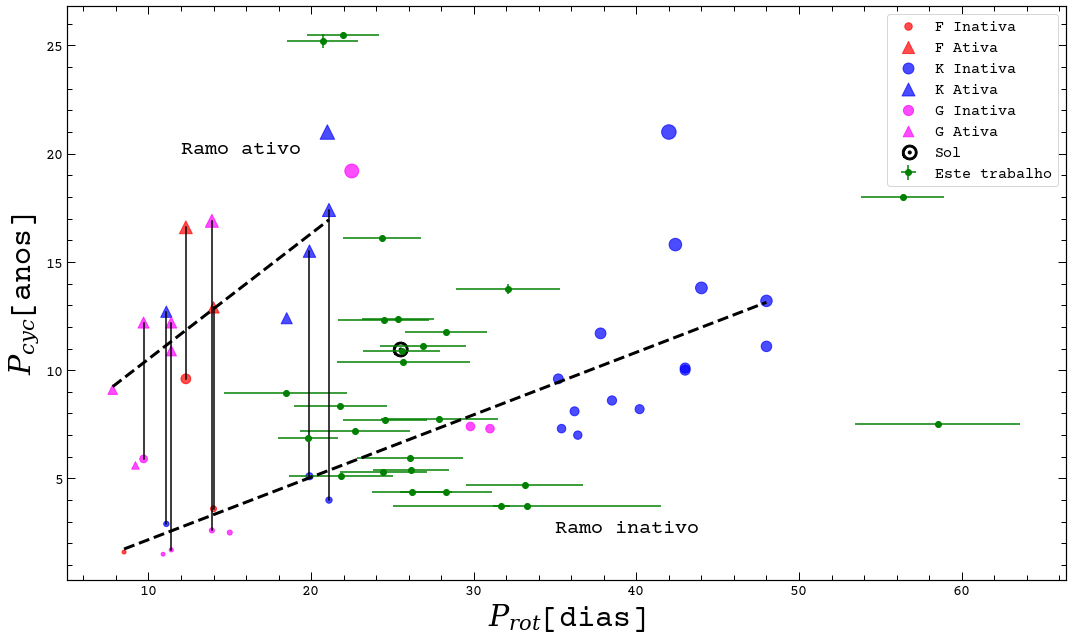

In [30]:
#Prot[d] vs Pcyc[yr]
dfcor = ativo.sort_values(by=['Prot'])
x1 = dfcor['Prot']
y1 = dfcor['Pcyc']
y1_pred = fit_linear(x1,y1)

xx = np.linspace(8,30,13)

dfcor2 = inativo.sort_values(by=['Prot'])
x2 = dfcor2['Prot']
y2 = dfcor2['Pcyc']
y2_pred = fit_linear(x2,y2)

fig = plt.figure(figsize = (15,9))

plt.plot((x,x),([i for (i,j) in y], [j for (i,j) in y]),c='black')
plt.plot(x1,y1_pred, color="black",linestyle='dashed', lw=3)
plt.plot(x2,y2_pred, color="black",linestyle='dashed', lw=3)
plt.scatter(F['Prot'], F['Pcyc'],color='red', marker='o', alpha=0.7,label='F Inativa',s=10*F['Pcyc'])
plt.scatter(FA['Prot'], FA['Pcyc'],color='red', marker='^', alpha=0.7,label='F Ativa',s=10*FA['Pcyc'])
plt.scatter(K['Prot'], K['Pcyc'],color='blue', marker='o', alpha=0.7, label='K Inativa',s=10*K['Pcyc'])
plt.scatter(KA['Prot'], KA['Pcyc'],color='blue', marker='^', alpha=0.7, label='K Ativa',s=10*KA['Pcyc'])
plt.scatter(G['Prot'], G['Pcyc'],color='magenta', marker='o', alpha=0.7,label='G Inativa',s=10*G['Pcyc'])
plt.scatter(GA['Prot'], GA['Pcyc'],color='magenta', marker='^', alpha=0.7,label='G Ativa',s=10*GA['Pcyc'])
#plt.scatter(22.7, 7.1,color='black', marker='o', alpha=0.7, label='18sco published', s=200)
#plt.scatter(22.7, 7.1,color='magenta', marker='^', alpha=0.7, s=10*7.1)
#plt.scatter(22.7, 14.5,color='green', marker='*', alpha=0.7,label='18sco found', s=200)
plt.errorbar(x = data['P'],y = data['Pcyc'], xerr = data['eP'], yerr= data['e_Pcyc'], fmt='o', color='green',
            label='Este trabalho')

plt.scatter(25.4, 11,color='black', marker='$\odot$', alpha=1,label='Sol',s=300)
#plt.scatter(25.4, 80,color='black', marker='$\odot$', alpha=0.7,label='Sun big cycle',s=200)
plt.text(12, 20, r'Ramo ativo', fontsize=20)
plt.text(35, 2.5, r'Ramo inativo', fontsize=20)



plt.xlabel(r'$P_{rot} $[dias]', {'color': 'k','fontsize': 30})
plt.ylabel(r"$P_{cyc} $[anos]", {'color': 'k','fontsize': 30})

sm_ted()
plt.tight_layout()
plt.legend(prop={'size': 15})
plt.savefig('Prot_Pcyc.png', dpi=300)
plt.savefig('Prot_Pcyc.pdf', dpi=300)
plt.show()

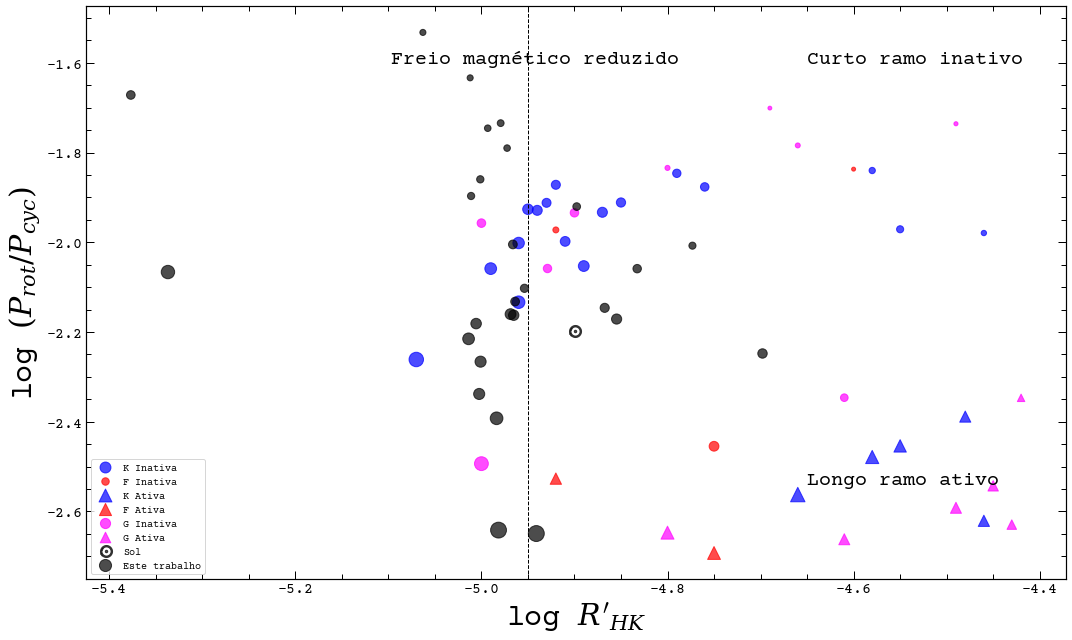

In [58]:
#log(Prot/Pcyc) vs log R'hk
fig = plt.figure(figsize = (15,9))
plt.scatter(K['logRhk'], K['log(Prot/Pcyc)'],color='blue', marker='o', alpha=0.7, label='K Inativa',s=10*K['Pcyc'])
plt.scatter(F['logRhk'], F['log(Prot/Pcyc)'],color='red', marker='o', alpha=0.7,label='F Inativa',s=10*F['Pcyc'])
plt.scatter(KA['logRhk'], KA['log(Prot/Pcyc)'],color='blue', marker='^', alpha=0.7, label='K Ativa',s=10*KA['Pcyc'])
plt.scatter(FA['logRhk'], FA['log(Prot/Pcyc)'],color='red', marker='^', alpha=0.7,label='F Ativa',s=10*FA['Pcyc'])
plt.scatter(G['logRhk'], G['log(Prot/Pcyc)'],color='magenta', marker='o', alpha=0.7,label='G Inativa',s=10*G['Pcyc'])
plt.scatter(GA['logRhk'], GA['log(Prot/Pcyc)'],color='magenta', marker='^', alpha=0.7,label='G Ativa',s=10*GA['Pcyc'])
plt.scatter(-4.93,-2.057525,color='magenta', marker='o', alpha=0.7,s=7.1*10) #,label='18Sco published'
#plt.scatter(-4.93,np.log10(22.7/(14*365)),color='green', marker='*', alpha=0.7,label='18Sco found',s=200)
plt.scatter(-4.90,np.log10(25.4/(11*365)),color='black', marker='$\odot$', alpha=0.7,label='Sol',s=200)
#plt.scatter(-4.90,np.log10(25.4/(80*365)),color='blue', marker='$\odot$', alpha=0.7,label='Sun big cycle',s=170)
plt.axvline(-4.95, linewidth=1, color='k', ls='--')
plt.scatter(data['logRhk_'],data['log(Prot/Pcyc)'], color='black', marker='o', alpha=0.7,s=10*data['Pcyc'], label='Este trabalho')
plt.xlabel(r"log $R'_{HK}$", {'color': 'k','fontsize': 30})
plt.ylabel(r"log $(P_{rot}/P_{cyc})$", {'color': 'k','fontsize': 30})
plt.text(-5.11,-1.6,' Freio magnético reduzido', fontsize=20)
plt.text(-4.65,-1.6,'Curto ramo inativo', fontsize=20)
plt.text(-4.65,-2.54,'Longo ramo ativo', fontsize=20)
sm_ted()
plt.tight_layout()
plt.legend()
plt.savefig('activity_rotation2.png', dpi=300)
plt.savefig('activity_rotation2.pdf', dpi=300)
plt.show()

In [ ]:
np.log10(22/(10.4*365))

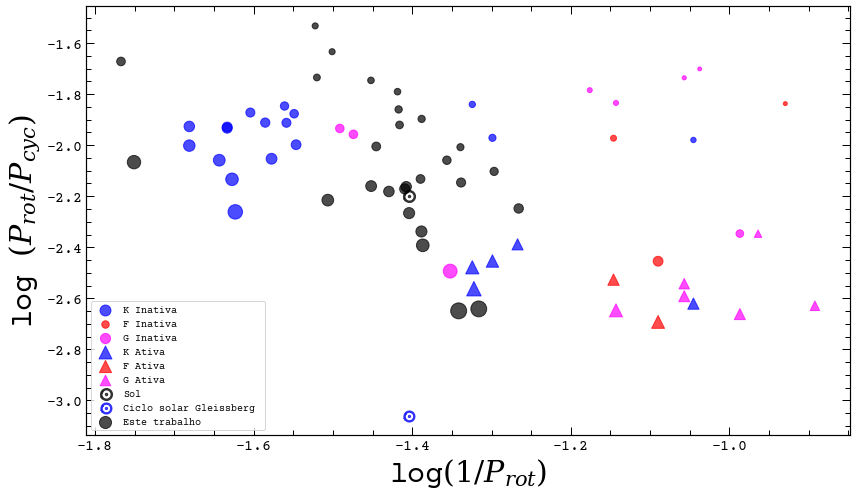

In [50]:
#log(1/ Prot) vs log(Prot/Pcyc) 
#Adimentional quantities
fig = plt.figure(figsize = (15,9))
plt.scatter(np.log10(1/K['Prot']), K['log(Prot/Pcyc)'],color='blue', marker='o', alpha=0.7, label='K Inativa',s=10*K['Pcyc'])
plt.scatter(np.log10(1/F['Prot']), F['log(Prot/Pcyc)'],color='red', marker='o', alpha=0.7,label='F Inativa', s=10*F['Pcyc'])
plt.scatter(np.log10(1/G['Prot']), G['log(Prot/Pcyc)'],color='magenta', marker='o', alpha=0.7,label='G Inativa', s=10*G['Pcyc'])
plt.scatter(np.log10(1/KA['Prot']), KA['log(Prot/Pcyc)'],color='blue', marker='^', alpha=0.7, label='K Ativa', s=10*KA['Pcyc'])
plt.scatter(np.log10(1/FA['Prot']), FA['log(Prot/Pcyc)'],color='red', marker='^', alpha=0.7,label='F Ativa', s=10*FA['Pcyc'])
plt.scatter(np.log10(1/GA['Prot']), GA['log(Prot/Pcyc)'],color='magenta', marker='^', alpha=0.7,label='G Ativa' , s=10*GA['Pcyc'])
#plt.scatter(np.log10(1/22.7),np.log10(22.7/(6.9*365)),color='black', marker='*', alpha=0.7,label='18Sco published',s=200)
#plt.scatter(np.log10(1/18),np.log10(22.7/(14*365)),color='green', marker='*', alpha=0.7,label='18Sco found',s=200)
plt.scatter(np.log10(1/25.4),np.log10(25.4/(11*365)),color='black', marker='$\odot$', alpha=0.7,label='Sol',s=200)
plt.scatter(np.log10(1/25.4),np.log10(25.4/(80*365)),color='blue', marker='$\odot$', alpha=0.7,label='Ciclo solar Gleissberg ',s=170)
#plt.axvline(-4.95, linewidth=1, color='k', ls='--')
plt.scatter(np.log10(1/data['P']),data['log(Prot/Pcyc)'], color='black', marker='o', alpha=0.7,s=10*data['Pcyc'], label='Este trabalho')
plt.xlabel(r"log$(1 / P_{rot})$", {'color': 'k','fontsize': 30})
plt.ylabel(r"log $(P_{rot}/P_{cyc})$", {'color': 'k','fontsize': 30})

sm_ted()
plt.tight_layout()
plt.legend()
plt.savefig('log (Prot_Pcyc) vs log (1_Prot).png', dpi=300)
plt.savefig('log (Prot_Pcyc) vs log (1_Prot).pdf', dpi=300)

plt.show()

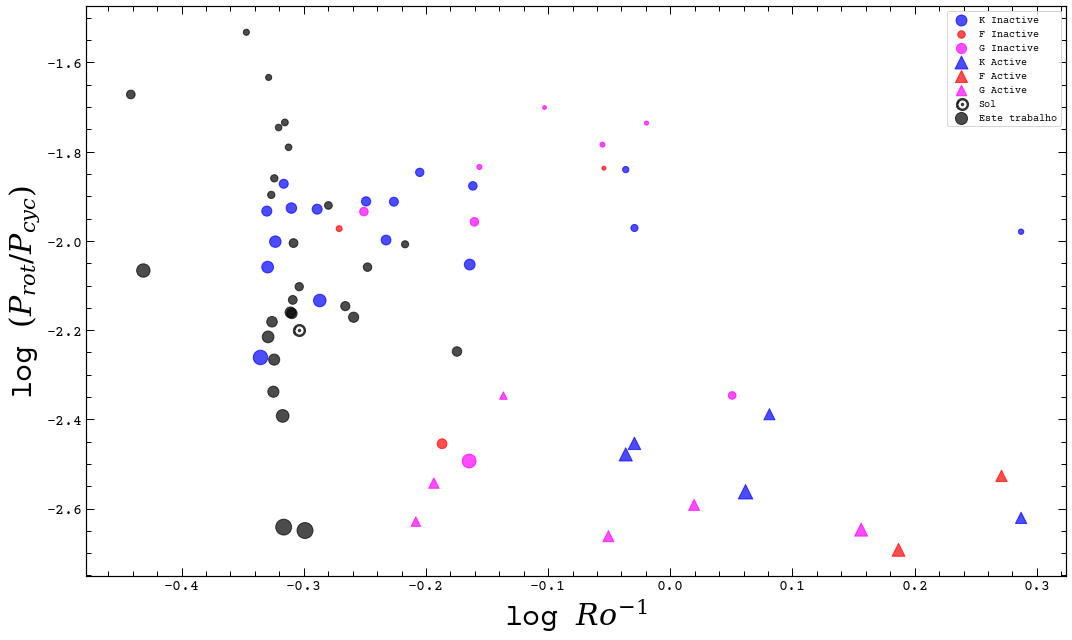

In [59]:
#log(Ro^-1) vs log (Prot / Pcyc)
fig = plt.figure(figsize = (15,9))
plt.scatter(np.log10(1/K['Ro']), K['log(Prot/Pcyc)'],color='blue', marker='o', alpha=0.7, label='K Inactive', s=10*K['Pcyc'])
plt.scatter(np.log10(1/F['Ro']), F['log(Prot/Pcyc)'],color='red', marker='o', alpha=0.7,label='F Inactive', s=10*F['Pcyc'])
plt.scatter(np.log10(1/G['Ro']), G['log(Prot/Pcyc)'],color='magenta', marker='o', alpha=0.7,label='G Inactive', s=10*G['Pcyc'])
plt.scatter(np.log10(1/KA['Ro']), KA['log(Prot/Pcyc)'],color='blue', marker='^', alpha=0.7, label='K Active', s=10*KA['Pcyc'])
plt.scatter(np.log10(FA['Ro']), FA['log(Prot/Pcyc)'],color='red', marker='^', alpha=0.7,label='F Active', s=10*FA['Pcyc'])
plt.scatter(np.log10(GA['Ro']), GA['log(Prot/Pcyc)'],color='magenta', marker='^', alpha=0.7,label='G Active', s=10*GA['Pcyc'])
#plt.scatter(np.log10(1/(22.7/12.0)),-2.057525,color='black', marker='*', alpha=0.7,label='18Sco published',s=200)
#plt.scatter(np.log10(1/(14.0/12.0)),np.log10(22.7/(14*365)),color='green', marker='*', alpha=0.7,label='18Sco found',s=200)
plt.scatter(np.log10(1/(25.4/12.6)),np.log10(25.4/(11*365)),color='black', marker='$\odot$', alpha=0.7,label='Sol',s=200)
#plt.scatter(np.log10(1/(25.4/12.6)),np.log10(25.4/(80*365)),color='blue', marker='$\odot$', alpha=0.7,label='Sun big cycle',s=170)
#plt.axvline(-4.95, linewidth=1, color='k', ls='--')
plt.scatter(np.log10(1/data['Ro']),data['log(Prot/Pcyc)'], color='black', marker='o', alpha=0.7,s=10*data['Pcyc'], label='Este trabalho')

plt.xlabel(r"log $Ro^{-1}$", {'color': 'k','fontsize': 30})
plt.ylabel(r"log $(P_{rot}/P_{cyc})$", {'color': 'k','fontsize': 30})

sm_ted()
plt.tight_layout()
plt.legend()
plt.savefig('log Prot_Pcyc vs log Ro-1.png', dpi=200)
plt.savefig('log Prot_Pcyc vs log Ro-1.pdf', dpi=200)

plt.show()

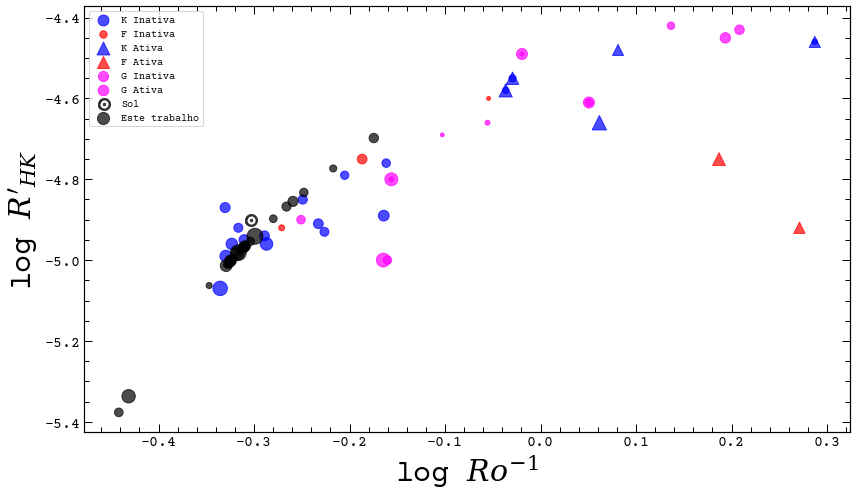

In [57]:
#log(Ro^-1) vs log R'hk
fig = plt.figure(figsize = (15,9))
plt.scatter(np.log10(1/K['Ro']), K['logRhk'],color='blue', marker='o', alpha=0.7, label='K Inativa', s=10*K['Pcyc'])
plt.scatter(np.log10(1/F['Ro']), F['logRhk'],color='red', marker='o', alpha=0.7,label='F Inativa', s=10*F['Pcyc'])
plt.scatter(np.log10(1/KA['Ro']), KA['logRhk'],color='blue', marker='^', alpha=0.7, label='K Ativa', s=10*KA['Pcyc'])
plt.scatter(np.log10(FA['Ro']), FA['logRhk'],color='red', marker='^', alpha=0.7,label='F Ativa', s=10*FA['Pcyc'])
plt.scatter(np.log10(1/G['Ro']), G['logRhk'],color='magenta', marker='o', alpha=0.7,label='G Inativa', s=10*G['Pcyc'])
plt.scatter(np.log10(1/GA['Ro']), GA['logRhk'],color='magenta', marker='o', alpha=0.7,label='G Ativa', s=10*GA['Pcyc'])
#plt.scatter(np.log10(1/(22.7/12.0)),-4.93,color='black', marker='*', alpha=0.7,label='18Sco published',s=200)
#plt.scatter(np.log10(1/(22.7/12.0)),-4.93,color='green', marker='*', alpha=0.7,label='18Sco found',s=200)
plt.scatter(np.log10(1/(25.4/12.6)),-4.90,color='black', marker='$\odot$', alpha=0.7,label='Sol',s=200)
#plt.axvline(-4.95, linewidth=1, color='k', ls='--')
plt.xlabel(r"log $Ro^{-1}$", {'color': 'k','fontsize': 30})
plt.ylabel(r"log $R'_{HK}$", {'color': 'k','fontsize': 30})
plt.scatter(np.log10(1/data['Ro']),data['logRhk_'], color='black', marker='o', alpha=0.7,s=10*data['Pcyc'], label='Este trabalho')


sm_ted()
plt.tight_layout()
plt.legend()
plt.savefig('logRhk vs log Ro-1.png', dpi=300)
plt.savefig('logRhk vs log Ro-1.pdf', dpi=300)

plt.show()